### Importing necessary libraries

In [2]:
import tensorflow
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
from emnist import list_datasets

In [4]:
# All classes in the emnist dataset
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples, extract_test_samples

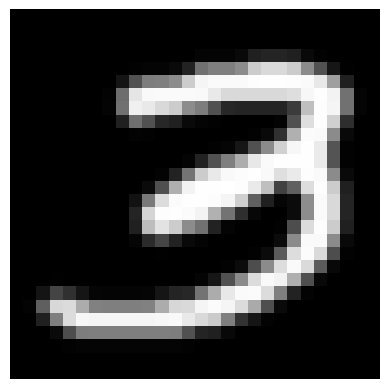

In [20]:
# Checking my dataset

import matplotlib.pyplot as plt

# Load the EMNIST dataset
x_train, y_train = extract_training_samples('mnist')
x_test, y_test = extract_test_samples('mnist')
# Display an image from the training dataset
plt.imshow(x_test[5899], cmap='gray')
plt.axis('off')
plt.show()

In [6]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# One hot encode target values
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [8]:
# Load the pre-trained CNN MNIST model
base_model = tensorflow.keras.models.load_model('mnist_model.h5')

In [9]:
# Modify the architecture
x = Dense(256, activation='relu', name='transfer_dense_1')(base_model.output)
output = Dense(10, activation='softmax', name='transfer_dense_2')(x)

In [10]:
# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=output)

In [11]:
# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [12]:
# Compile the model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model and collect history
history = transfer_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 27s 27ms/step - loss: 0.3118 - accuracy: 0.9468 - val_loss: 0.1629 - val_accuracy: 0.9570
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.1620 - accuracy: 0.9591 - val_loss: 0.1502 - val_accuracy: 0.9608
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.1542 - accuracy: 0.9616 - val_loss: 0.1435 - val_accuracy: 0.9621
Epoch 4/5
938/938 [==============================] - 26s 27ms/step - loss: 0.1483 - accuracy: 0.9630 - val_loss: 0.1373 - val_accuracy: 0.9639
Epoch 5/5
938/938 [==============================] - 28s 29ms/step - loss: 0.1428 - accuracy: 0.9645 - val_loss: 0.1308 - val_accuracy: 0.9661


In [14]:
# Evaluate the model
score = transfer_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13084523379802704
Test accuracy: 0.9660999774932861


In [15]:
# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

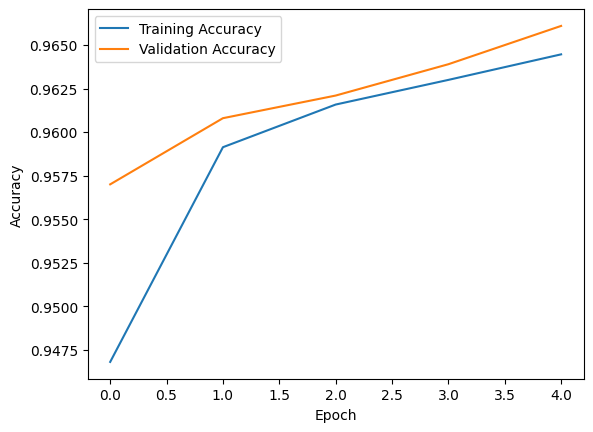

In [16]:
# Plot accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

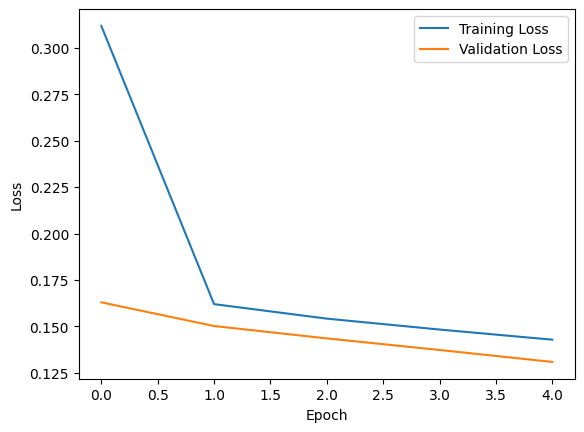

In [17]:
# Plot loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
import numpy as np

# Predictions on the test set

# Single value prediction in number
# Taking the 5999th image from the test set and returns the index of the class with the highest probability
predictions = transfer_model.predict(x_test, verbose = 0)
print(np.argmax(np.round(predictions[5899])))

3


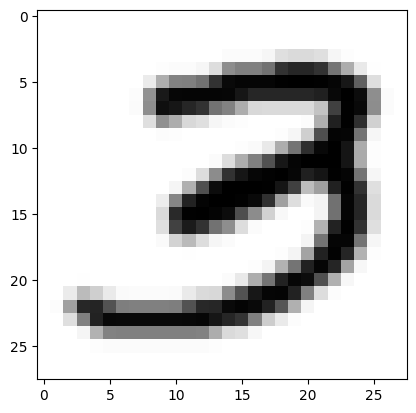

In [19]:
# Single value prediction in graph (plot)

# This will display the binary image corresponding to the 5999th test sample from the EMNIST dataset
plt.imshow(x_test[5899].reshape(28,28), cmap = plt.cm.binary)
plt.show()